[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Logistic Regression Accuracy: 0.33
Naive Bayes Accuracy: 0.33
SVM Accuracy: 0.67


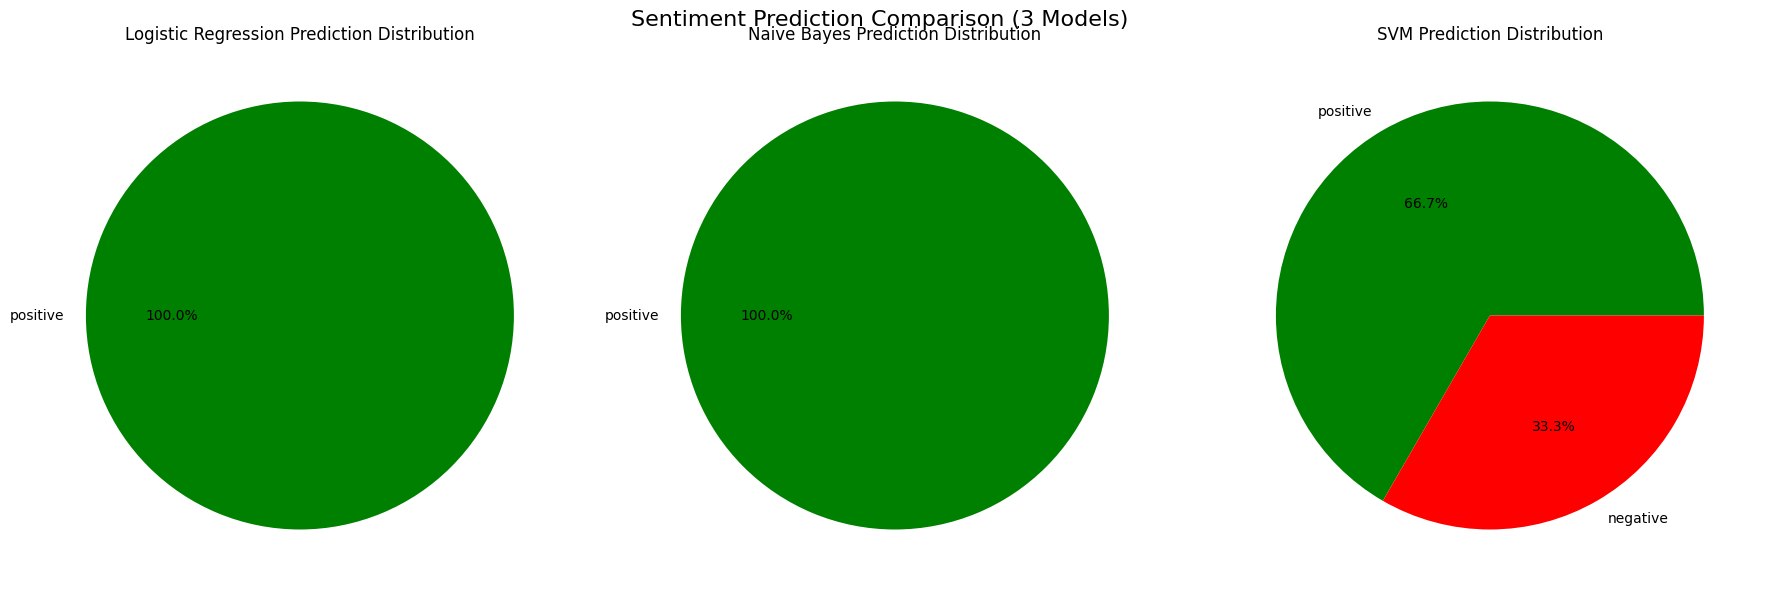

In [2]:
# ✈️ Self-contained NLP program comparing 3 models using pie charts

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# 🔄 Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# 📄 Inbuilt airline tweet dataset
data = {
    'text': [
        "I love flying with @SouthwestAir! Great service every time.",
        "@united worst flight experience ever. Delayed 3 times.",
        "Thanks @Delta for the smooth ride and on-time landing!",
        "I’ll never fly with @AmericanAir again. Rude staff and bad food.",
        "Very satisfied with @JetBlue. Comfortable and friendly crew.",
        "@USAirways what a mess. Lost my luggage and no help at all.",
        "Boarding was easy and the flight was early. Kudos @AlaskaAir!",
        "Terrible experience on @united. Broken seats and delays.",
        "Great job @Delta! Keep it up!",
        "@AmericanAir your customer service is pathetic. No answers ever."
    ],
    'airline_sentiment': [
        "positive", "negative", "positive", "negative", "positive",
        "negative", "positive", "negative", "positive", "negative"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# 🧼 Preprocess text
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(preprocess)

# 🔠 Vectorize text
X = df['clean_text']
y = df['airline_sentiment']
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# 🎲 Split data
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.3, random_state=42)

# 🤖 Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}

# 📊 Train models and collect predictions
predictions = {}
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    predictions[name] = preds
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.2f}")

# 🥧 Compare Sentiment Distributions with Pie Charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colors = {'positive': 'green', 'negative': 'red'}

for ax, (name, preds) in zip(axes, predictions.items()):
    sentiment_counts = pd.Series(preds).value_counts()
    labels = sentiment_counts.index
    sizes = sentiment_counts.values
    chart_colors = [colors[label] for label in labels]

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=chart_colors)
    ax.set_title(f"{name} Prediction Distribution")

plt.suptitle("Sentiment Prediction Comparison (3 Models)", fontsize=16)
plt.tight_layout()
plt.show()

